In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory="mrl/"
classes=['close','open']

In [3]:
img_size=224

In [4]:
training_data=[]
def creating_training_data():
    for c in classes:
        path=os.path.join(directory,c)
        class_num=classes.index(c)
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                back_rgb=cv2.cvtColor(img_arr,cv2.COLOR_GRAY2RGB)
                new_arr=cv2.resize(back_rgb,(img_size,img_size))
                training_data.append([new_arr,class_num])
            except Exception as e:
                pass

In [5]:
creating_training_data()

In [6]:
import random

In [7]:
random.shuffle(training_data)

In [8]:
x=[]
y=[]
for feature,lable in training_data:
    x.append(feature)
    y.append(lable)
x=np.array(x).reshape(-1,img_size,img_size,3)

In [9]:
x=x/255.0

In [10]:
y=np.array(y)

In [11]:
import pickle

In [12]:
po=open("x_mob.pickle","wb")
pickle.dump(x,po)
po.close()

In [13]:
po=open("y_mob.pickle","wb")
pickle.dump(y,po)
po.close()

In [14]:
pi=open("x_mob.pickle","rb")
x=pickle.load(pi)

In [15]:
pi=open("y_mob.pickle","rb")
y=pickle.load(pi)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
from tensorflow.keras.applications import MobileNetV2

In [18]:
weights_path='mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224.h5'
model = tf.keras.applications.MobileNetV2(weights=weights_path)
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [19]:
base_input=model.input

In [22]:
base_op=model.layers[-2].output  #remove top layers

In [23]:
base_op

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [24]:
base_op= layers.Flatten()(base_op)

In [25]:
final_output= tf.keras.layers.Dense(1,activation='sigmoid')(base_op)

In [26]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [27]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 2,225,153 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [28]:
from tensorflow.keras.metrics import MeanSquaredError

In [29]:
import tensorflow as tf
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    # Convert predictions to binary (0 or 1)
    y_pred_binary = K.round(y_pred)
    
    # True positives, false positives, and false negatives
    tp = K.sum(K.cast(K.equal(y_true, 1) & K.equal(y_pred_binary, 1), dtype='float32'))
    fp = K.sum(K.cast(K.equal(y_true, 0) & K.equal(y_pred_binary, 1), dtype='float32'))
    fn = K.sum(K.cast(K.equal(y_true, 1) & K.equal(y_pred_binary, 0), dtype='float32'))
    
    # Precision and Recall
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    
    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [30]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy", MeanSquaredError(),f1_score])

In [31]:
# Ensure x and y are not None and have proper data types
print(type(x))
print(type(y))
# Example shape check
print(x.shape)  # Should be (num_samples, num_features)
print(y.shape)  # Should be (num_samples,) or (num_samples, 1)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(3663, 224, 224, 3)
(3663,)


In [32]:
history=new_model.fit(x,y,epochs=10,verbose=1)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9409 - f1_score: 0.4652 - loss: 0.1403 - mean_squared_error: 0.0408
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9849 - f1_score: 0.4876 - loss: 0.0409 - mean_squared_error: 0.0115
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.9874 - f1_score: 0.4892 - loss: 0.0367 - mean_squared_error: 0.0094
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9851 - f1_score: 0.4796 - loss: 0.0409 - mean_squared_error: 0.0111
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9941 - f1_score: 0.4758 - loss: 0.0162 - mean_squared_error: 0.0044
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.9929 - f1_score: 0.4934 - loss: 0.0192 - mean_squared_error: 0.0054
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9937 - f1_score: 0.4901 - loss: 0.0187 - mean_squared_error: 0.0051
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - 

In [33]:
import matplotlib.pyplot as plt

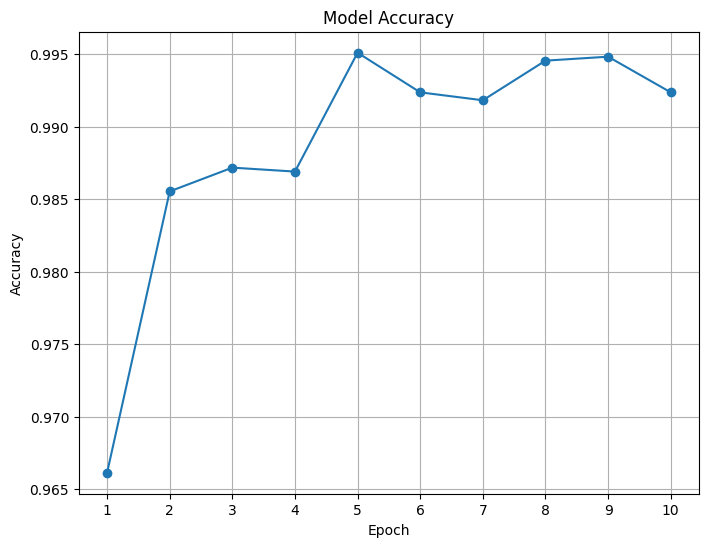

In [34]:
# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Set the x-axis to have ticks every 1 unit, starting from 1
plt.xticks(range(1, len(history.history['accuracy']) + 1, 1))

plt.show()

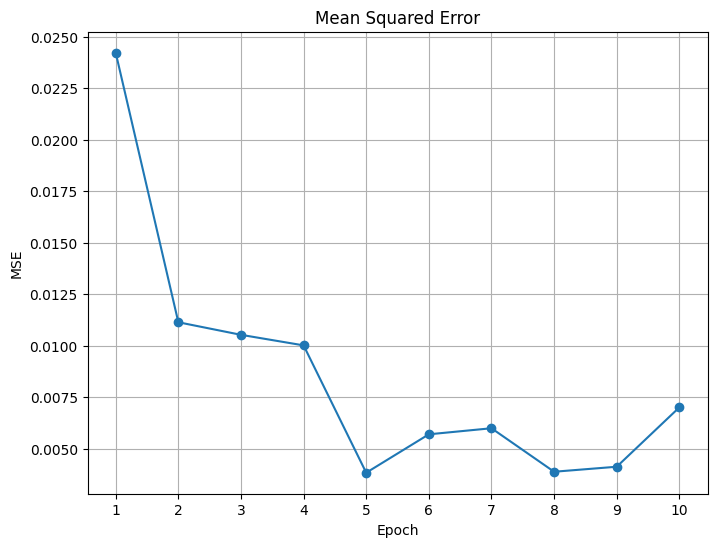

In [35]:
# Plot Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))

# Adjust x-values to start from 1
plt.plot(range(1, len(history.history['mean_squared_error']) + 1), history.history['mean_squared_error'], marker='o')

plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)

# Set x-axis to have ticks starting from 1
plt.xticks(range(1, len(history.history['mean_squared_error']) + 1, 1))

plt.show()

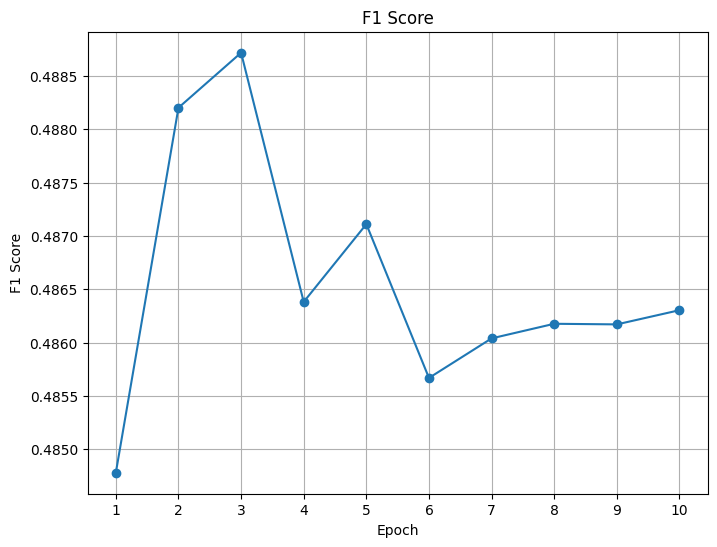

In [36]:
# Plot F1 Score
plt.figure(figsize=(8, 6))

# Adjust x-values to start from 1
plt.plot(range(1, len(history.history['f1_score']) + 1), history.history['f1_score'], marker='o')

plt.title('F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.grid(True)

# Set x-axis to have ticks starting from 1
plt.xticks(range(1, len(history.history['f1_score']) + 1, 1))

plt.show()

In [39]:
# Assuming new_model is your trained model
new_model.save('Drowsiness_Detection_MRL_Main_Mobilenetv2.h5')

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
nm=tf.keras.models.load_model('Drowsiness_Detection_MRL_Main.h5')

In [41]:
test_image="mrl/Screenshot 2024-09-03 at 12.13.14 AM.png"

In [42]:
img=cv2.imread("mrl/Screenshot 2024-09-03 at 12.13.14 AM.png",cv2.IMREAD_GRAYSCALE)

In [43]:
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [44]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

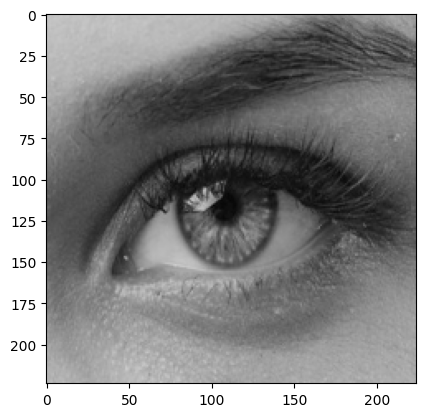

In [45]:
plt.imshow(new_array)

In [46]:
X_input=X_input/255.0

In [47]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


In [48]:
prediction

array([[1.]], dtype=float32)

In [49]:
img=cv2.imread("mrl/Screenshot 2024-09-03 at 12.16.45 AM.png",cv2.IMREAD_GRAYSCALE)

In [50]:
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [51]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

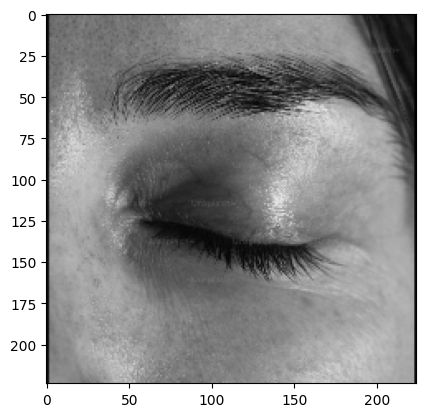

In [52]:
plt.imshow(new_array)

In [53]:
X_input=X_input/255.0

In [54]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [55]:
prediction

array([[1.]], dtype=float32)

In [56]:
img=cv2.imread("mrl/close/s0001_00044_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

In [57]:
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [58]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

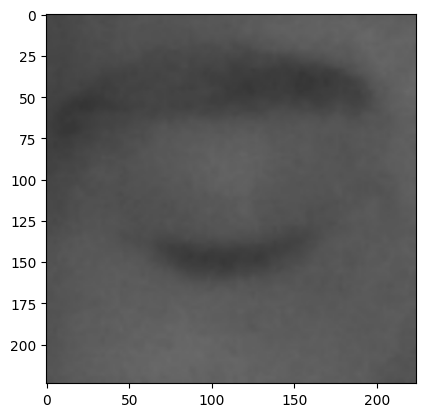

In [59]:
plt.imshow(new_array)

In [60]:
X_input=X_input/255.0

In [61]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [62]:
prediction

array([[1.]], dtype=float32)